In [1]:
import Pkg

In [2]:
using Plots,Random,CurveFit,GaussianProcesses

In [3]:
n=100 # length of read
len=1e7/n # no. of reads
len=Int64(len) # length of genome: 1e7
x=rand(1:1e7,len);  # Using random the starting positions of reads of length 100 are simulated and stored in an array

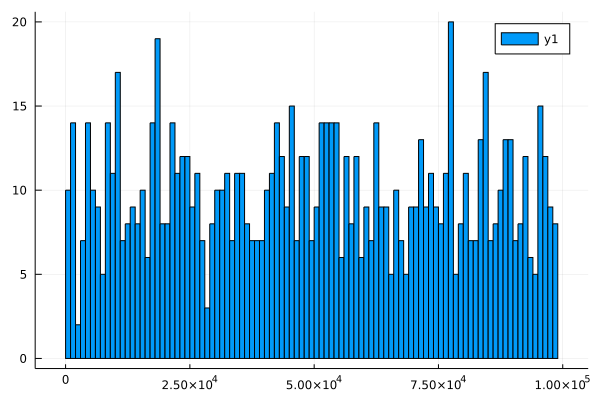

In [4]:
histogram(x,bins=1:1000:1e5)

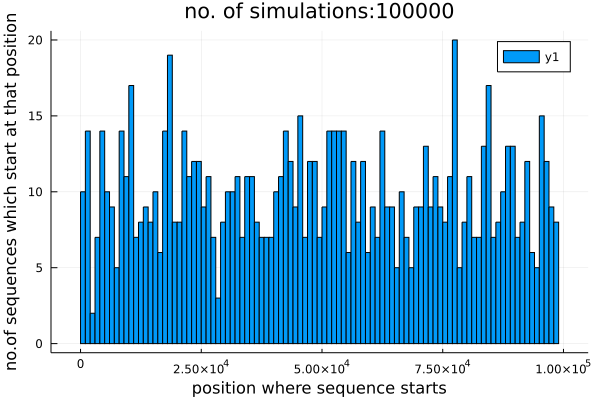

In [5]:
histogram(x,bins=1:1000:1e5)
xlabel!("position where sequence starts")
ylabel!("no.of sequences which start at that position")
title!("no. of simulations:"*string(len))

### The algorithm for previous plots seems to be difficult for two coverages and above , so in the next algorithm we simulate the starting position of a read and add 1.0 to next 100 positions as well. so the final array which we obtain we will have no. of coverages above a particular location. The array will look like  [1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1] , by visual inspection for coverage 1 we have 2 regions of length 1 and 2. For coverage 2 the lengths will be 1 and 4. For coverage 3 the lengths will be 3 alone. The below code just finds the length of these regions and plots are plotted.

In [6]:
len=Int32(1e7)
n=100
s=Int32(4*len/n)
a=zeros(Int32,len)
for i in 1:s
    j=rand(1:len-100)
    a[j]+=1
    a[j+100] -= 1
end
# integrating the derivative array
for pos in 2:len
  a[pos]=a[pos]+a[pos-1]
end

In [ ]:
plot(1:length(a),a)
title!("array of steps")
xlabel!("various positions on genome")
ylabel!("no. of reads on top of that particular location")

single function to calculate all lengths for various overlaps

In [7]:
function heights(a)
    length_dist = Dict{Int, Vector{Int}}()
    d=1
    h=a[1]
    for i in 2:len
      if a[i]==h
          d+=1
      else
          if d>0
              push!(get!(length_dist, h, Int[]), d)
          d=1
          h=a[i]
          end
      end
    end
  return length_dist
  end

heights (generic function with 1 method)

In [8]:
heights(a)

Dict{Int64, Vector{Int64}} with 17 entries:
  5  => [2, 3, 24, 14, 4, 3, 4, 11, 6, 2  …  3, 26, 10, 8, 6, 12, 19, 33, 4, 3]
  16 => [1, 2, 6, 3, 1, 7, 4, 3, 10]
  12 => [8, 13, 15, 4, 6, 7, 4, 3, 8, 2  …  3, 14, 2, 5, 4, 9, 41, 9, 10, 5]
  8  => [37, 7, 9, 6, 3, 2, 5, 5, 7, 2  …  1, 1, 3, 15, 4, 1, 5, 5, 1, 8]
  1  => [15, 25, 39, 26, 12, 4, 68, 32, 9, 4  …  8, 21, 33, 8, 14, 58, 32, 9, 5…
  0  => [11, 17, 19, 3, 21, 26, 13, 132, 72, 50  …  4, 27, 43, 6, 44, 9, 44, 15…
  6  => [3, 2, 2, 4, 3, 18, 4, 11, 6, 1  …  30, 9, 1, 7, 5, 19, 19, 5, 6, 14]
  11 => [3, 17, 1, 6, 4, 7, 5, 25, 23, 5  …  8, 5, 19, 4, 1, 1, 3, 6, 3, 1]
  9  => [21, 35, 4, 1, 6, 7, 4, 11, 19, 1  …  12, 8, 7, 4, 1, 4, 14, 5, 6, 34]
  14 => [6, 5, 10, 12, 5, 9, 5, 1, 8, 10  …  8, 2, 1, 5, 9, 2, 1, 17, 17, 3]
  3  => [10, 13, 6, 3, 11, 16, 17, 15, 6, 8  …  7, 7, 9, 40, 7, 9, 38, 21, 6, 2]
  7  => [3, 10, 15, 33, 5, 5, 6, 15, 6, 3  …  39, 3, 2, 1, 29, 9, 6, 10, 4, 19]
  4  => [17, 3, 24, 3, 8, 4, 3, 6, 18, 1  …  5, 11, 37,

In [10]:
h=heights(a);

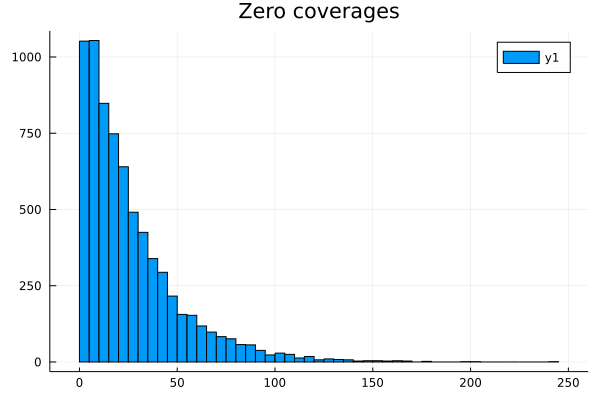

In [10]:
histogram(h[0],title="Zero coverages")

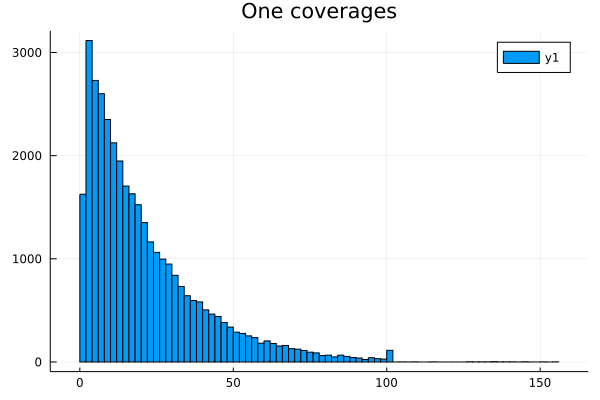

In [11]:
histogram(h[1],title="One coverages")

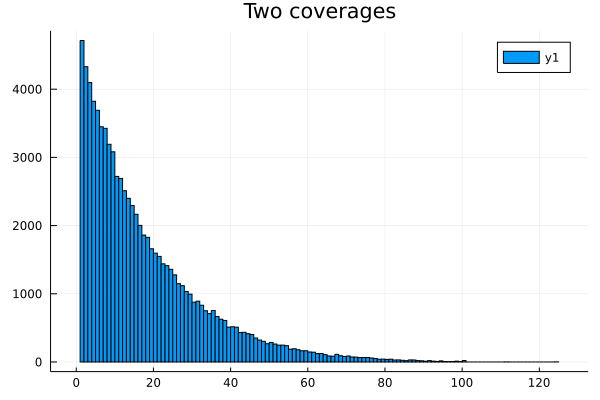

In [12]:
histogram(h[2],title="Two coverages")

In [13]:
function plot_exp_fit(h,index,str)
    error=0.0
    h0=fill(0.0,maximum(h[index]))
    for i in h[index]
        h0[i]+=1
    end
    x0=Float64[i for i in 1:maximum(h[index])]
    x0=x0[1:100]
    h0=h0[1:100]
    fit0=curve_fit(LinearFit,x0,log.(h0.+error))
    y0=fit0.(x0)
    plot(x0,log.(h0.+error),label="Simulated data")
    plot!(x0,y0,label="Exponential fit")
    title!(str*" coverages")
end

plot_exp_fit (generic function with 1 method)

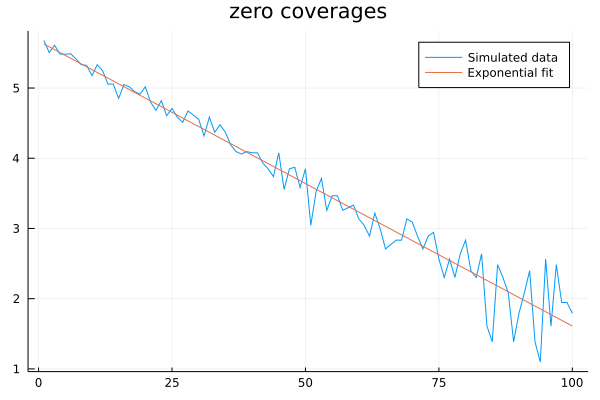

In [14]:
plot_exp_fit(h,0,"zero")

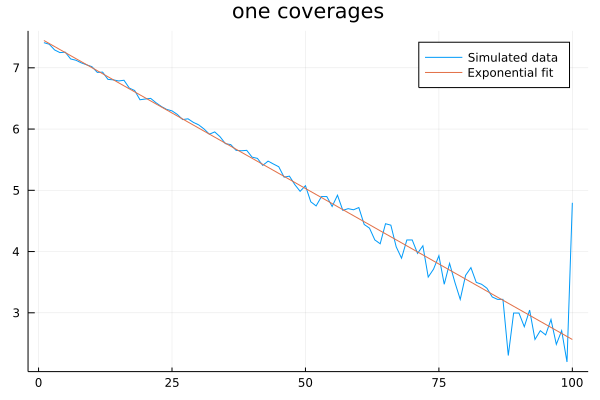

In [15]:
plot_exp_fit(h,1,"one")

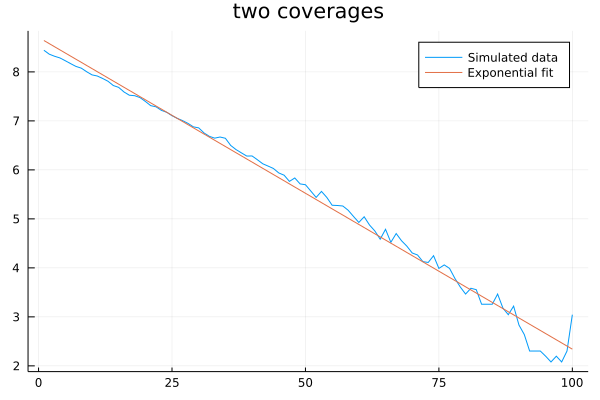

In [16]:
plot_exp_fit(h,2,"two")

In [27]:
se = SE(0.0, 0.0)
m = MeanZero()
gp1=GP(x1, y1,m,se)
gp2=GP(x2, y2,m,se)
gp0=GP(x0, y0,m,se);

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /home/dinesh/.julia/packages/Plots/lzHOt/src/pipeline.jl:26


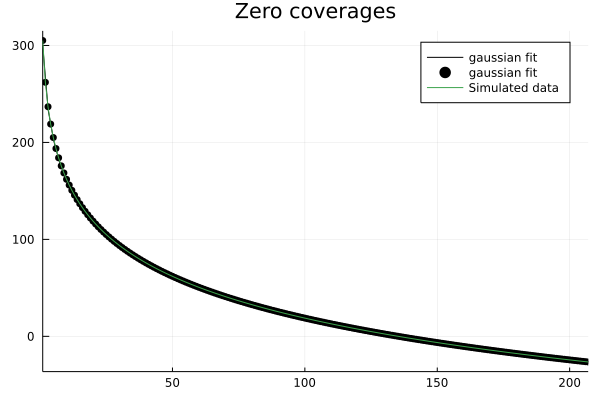

In [30]:
plot(gp0,label="gaussian fit")
plot!(x0,y0,label="Simulated data")
title!("Zero coverages")

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /home/dinesh/.julia/packages/Plots/lzHOt/src/pipeline.jl:26


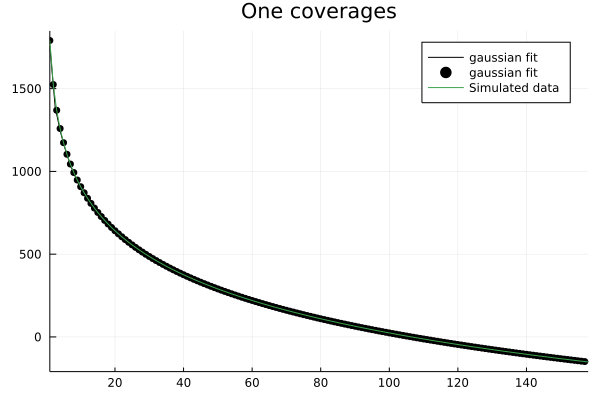

In [29]:
plot(gp1,label="gaussian fit")
plot!(x1,y1,label="Simulated data")
title!("One coverages")

┌ Warning: Attribute alias `color` detected in the user recipe defined for the signature (::GPE{LinearAlgebra.Adjoint{Float64, Vector{Float64}}, Vector{Float64}, MeanZero, SEIso{Float64}, GaussianProcesses.FullCovariance, GaussianProcesses.IsotropicData{Matrix{Float64}}, PDMats.PDMat{Float64, Matrix{Float64}}, GaussianProcesses.Scalar{Float64}}). To ensure expected behavior it is recommended to use the default attribute `seriescolor`.
└ @ Plots /home/dinesh/.julia/packages/Plots/lzHOt/src/pipeline.jl:26


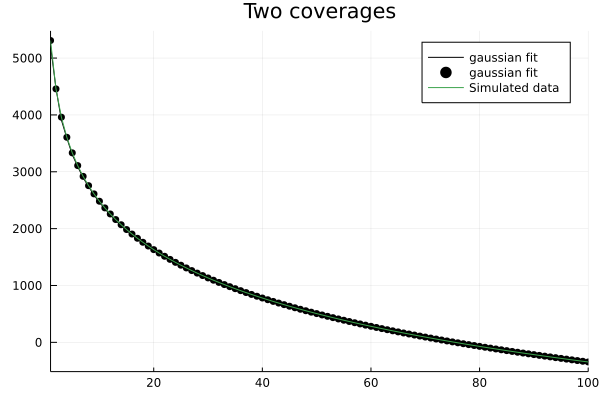

In [31]:
plot(gp2,label="gaussian fit")
plot!(x2,y2,label="Simulated data")
title!("Two coverages")